# Diagnostic Wisconsin Breast Cancer Database

In [125]:
# did you use all of these?

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as met
import sklearn.model_selection as sel
import sklearn.neighbors as nei
import sklearn.preprocessing as pre

## Dataset Review

Breast cancer is the second most common cancer after lung cancer, and the second most common cause of death among women worldwide ([Mohammed, Darrab, et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7351679/), 2020), affecting about 1 in 8 women during their lifetimes ([Paithankar](https://medium.com/swlh/breast-cancer-classification-using-python-e83719e5f97d), 2022). The best tool against breast cancer is early diagnosis, but this is notoriously difficult, and even then there can be significant variation in patient prognoses ([Mohammad, Teete, et al](https://www.hindawi.com/journals/abb/2022/6187275/), 2022). With this, there has been a large amount of academic literature dedicated to improving early detection models using machine-learning and algorithms on existing datasets.

The Wisconsin dataset consists of 569 results from Fine Needle Aspiration (FNA) examinations on patients presenting with possible breast cancer symptoms. The FNA examination is defined by the American Cancer Society as "a small amount of breast tissue or fluid... removed from a suspicious area with a thin, hollow needle and checked for cancer cells" ([ACS](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html), 2022). Each sample is then analysed by medical imaging software to produce the data seen below. The data was collected by Dr. William Wolberg of Wisconsin Hospital, while the images were converted into a digital format by William Street, a computer science researcher at the University of Wisconsin (Mohammad, Teete, et al, 2022).

In [2]:
# import the data using pandas' read_csv function

df = pd.read_csv('data.csv')
# remove id column and   a final column of blank data (solution from BTech Geeks in README)
df = df.drop(['id'],axis=1).drop(columns=df.columns[-1], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Each result consists of 32 attributes, starting with a unique whole-number ID (removed above) and an initial <i>diagnosis</i> item, which is a boolean (malignant/benign). These are followed by ten variables, where all descriptions are taken from [Sumbria](https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd) (2021): 
 - <i>radius</i>: "mean of distances from the center to points on the perimeter";
 - <i>texture</i>: "standard deviation of gray-scale values";
 - <i>perimeter</i>;
 - <i>area</i>;
 - <i>smoothness</i>: "local variation in radius lengths";
 - <i>compactness</i>: "perimeter$^2$ / area - 1.0";
 - <i>concavity</i>: "severity of concave portions of the contour";
 - <i>concave points</i>: "number of concave portions of the contour";
 - <i>symmetry</i>;
 - <i>fractal dimension</i>: "coastline approximation - 1".

For each of these, there is a mean, standard error and 'worst' value, which is in fact the mean of exclusively the largest three values ([Kalshtein](https://rpubs.com/Yael_K/329390), 2017). We can use Pandas' `describe` function to show a summary of each of these 30 numerical columns.

In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Of these, the <i>radius</i>, <i>texture</i>, <i>perimeter</i> and <i>area</i> are real values that track size, while the remaining items seem to be determined on a scale largely between 0 and 1. The former of these items will be referred to as 'spatial' values for the duration of this analysis, and the remaining items will be termed 'ratio' just because they appear to be standardised in some way.

Ultimately, the piece of information that needs to be predicted with accuracy, and undoubtedly the most important piece of information from any perspective, is that of the <i>diagnosis</i>. In the existing data, there are 357 benign diagnoses, leaving 212 malignant cases in the data ([Paithankar](https://medium.com/swlh/breast-cancer-classification-using-python-e83719e5f97d), 2022).

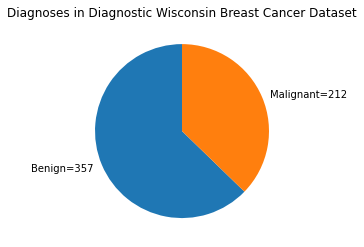

In [4]:
# parts of code taken from Paithankar and Matplotlib Pie Charts links in README
mb_count = df['diagnosis'].value_counts()
# create labels for each diagnosis
mb_b = f'Benign={mb_count[0]}'
mb_m = f'Malignant={mb_count[1]}'
mb_labels = [mb_b,mb_m]
# plot a simple pie chart
plt.pie(mb_count, labels=mb_labels,startangle=90)
plt.title('Diagnoses in Diagnostic Wisconsin Breast Cancer Dataset')
plt.show();

## Statistical Analysis

The above table and pie chart gives a cursory glance at summarised values, but does not reveal much more than that about each of the variables.

Below are plots containing the means of the spatial variables discussed earlier. Using Seaborn's histogram visual, this data can be quickly plotted and segmented by the particular diagnosis. The aim here is to identify variables that can be used in combination to reliably predict a diagnosis.

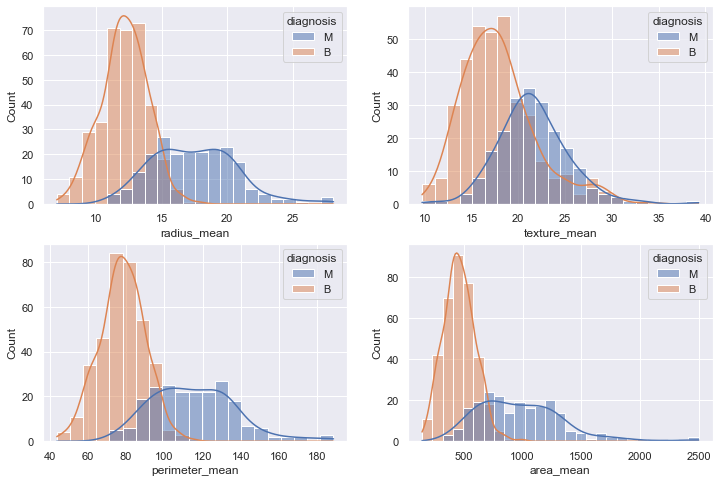

In [5]:
# solution for getting Seaborn histograms to work with subplots comes from Statology links in README
sns.set(rc={"figure.figsize":(12, 8)})
fig, axes = plt.subplots(2, 2)

# a plot for each of the spatial variables, separated by diagnosis
sns.histplot(data=df, x='radius_mean', hue='diagnosis',ax=axes[0,0],kde=True)
sns.histplot(data=df, x='texture_mean', hue='diagnosis',ax=axes[0,1],kde=True)
sns.histplot(data=df, x='perimeter_mean', hue='diagnosis',ax=axes[1,0],kde=True)
sns.histplot(data=df, x='area_mean', hue='diagnosis',ax=axes[1,1],kde=True)
plt.show()

Above we see a fairly consistent amount of overlap between the larger benign results and the smaller malignant results in each variable, except for the <i>texture</i>. For this, there is a more significant overlap, with benign results making up the majority of the lower end of the population, but with the upper two-thirds of the range considerably mixed.

Also interesting is the difference in distribution between the two diagnoses across all variables, with benign results often showing a large peak around the mean, while malignant results can be spread more evenly across a wider range. At least one of the results in each variable is approximately normally-distributed or exponentially-distributed ([Kalshtein](https://rpubs.com/Yael_K/329390), 2017). The <i>radius</i>, <i>perimeter</i> and <i>area</i> are probably the best-suited candidates for classification at this stage.

Following this, the remaining mean variables can be plotted using similar histograms, amending on the plot size to best-fit the number of plots.

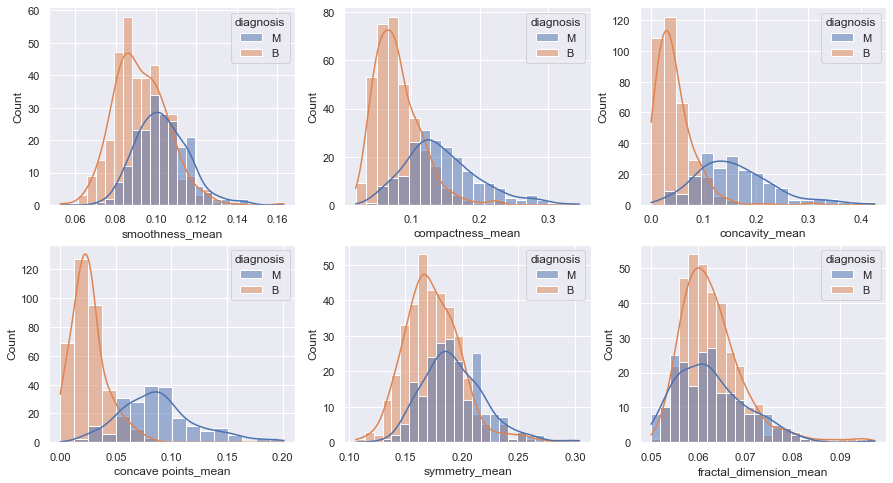

In [6]:
# ratio means

sns.set(rc={"figure.figsize":(15, 8)})
fig, axes = plt.subplots(2, 3)

sns.histplot(data=df, x='smoothness_mean', hue='diagnosis',ax=axes[0,0],kde=True)
sns.histplot(data=df, x='compactness_mean', hue='diagnosis',ax=axes[0,1],kde=True)
sns.histplot(data=df, x='concavity_mean', hue='diagnosis',ax=axes[0,2],kde=True)
sns.histplot(data=df, x='concave points_mean', hue='diagnosis',ax=axes[1,0],kde=True)
sns.histplot(data=df, x='symmetry_mean', hue='diagnosis',ax=axes[1,1],kde=True)
sns.histplot(data=df, x='fractal_dimension_mean', hue='diagnosis',ax=axes[1,2],kde=True)

plt.show()

Within the remaining six mean variables there is considerably more overlap between the diagnoses. The <i>concavity mean</i> and <i>concave points_mean</i> overlap as much as the previous four spatial values, but the other four variables show significant or total overlap, with only outliers appearing to indicate diagnoses one way or another.

As with the first set of mean variables, some differ in distribution between diagnoses. For instance, the <i>compactness_mean</i>, <i>concavity mean</i> and <i>concave points_mean</i> would appear to be normally distributed for malignant results, but log-normally-distributed for benign results. These three variables would also seem to be those best-suited to use as classifiers.

The remaining variable-diagnosis combinations appear to remain normally-distributed, apart from the malignant <i>fractal_dimension_mean</i> which displays Gamma or Chi-Squared distribution.

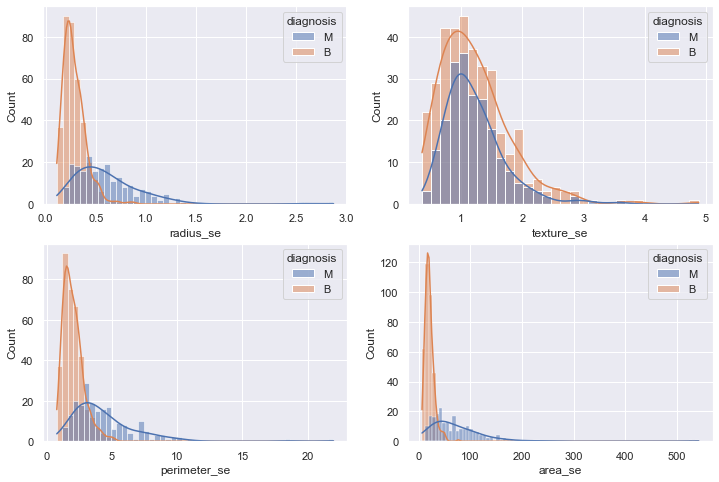

In [7]:
# spatial errors

sns.set(rc={"figure.figsize":(12, 8)})
fig, axes = plt.subplots(2, 2)

sns.histplot(data=df, x='radius_se', hue='diagnosis',ax=axes[0,0],kde=True)
sns.histplot(data=df, x='texture_se', hue='diagnosis',ax=axes[0,1],kde=True)
sns.histplot(data=df, x='perimeter_se', hue='diagnosis',ax=axes[1,0],kde=True)
sns.histplot(data=df, x='area_se', hue='diagnosis',ax=axes[1,1],kde=True)

plt.show()

Research ([Vedantu](https://www.vedantu.com/maths/standard-error-of-the-mean), 2023) indicates that this figure is a representation of the standard deviation of the population, so would not seem useful for a basic machine-learning exercise. Nevertheless, the distribution becomes log-normal or gamma-distributed instead of the normal curves seen previously. There is also significant overlap when results are split by diagnosis, rendering these items of little use in classification.

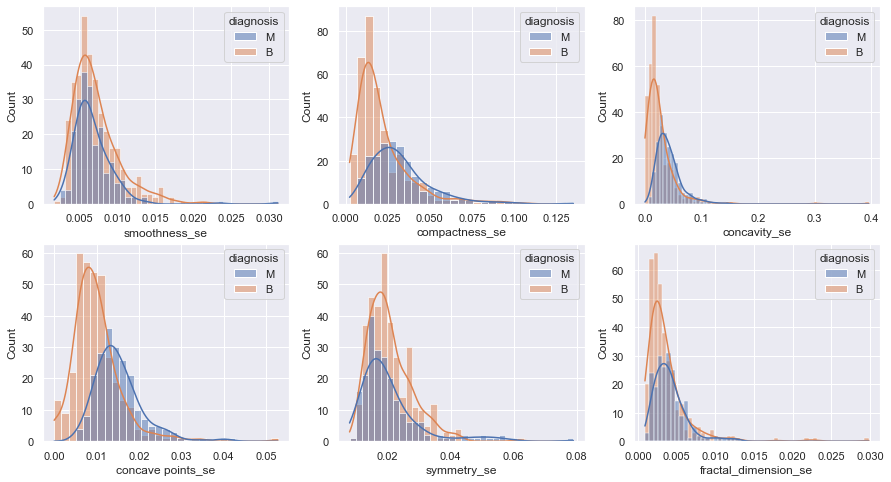

In [8]:
# ratio errors

sns.set(rc={"figure.figsize":(15, 8)})
fig, axes = plt.subplots(2, 3)

sns.histplot(data=df, x='smoothness_se', hue='diagnosis',ax=axes[0,0],kde=True)
sns.histplot(data=df, x='compactness_se', hue='diagnosis',ax=axes[0,1],kde=True)
sns.histplot(data=df, x='concavity_se', hue='diagnosis',ax=axes[0,2],kde=True)
sns.histplot(data=df, x='concave points_se', hue='diagnosis',ax=axes[1,0],kde=True)
sns.histplot(data=df, x='symmetry_se', hue='diagnosis',ax=axes[1,1],kde=True)
sns.histplot(data=df, x='fractal_dimension_se', hue='diagnosis',ax=axes[1,2],kde=True)

plt.show()

As above, overlap areas increase significantly, as well as creating log-normal or gamma-distributed distributions. As a result, none of these items seems suitable for use as a classifier.

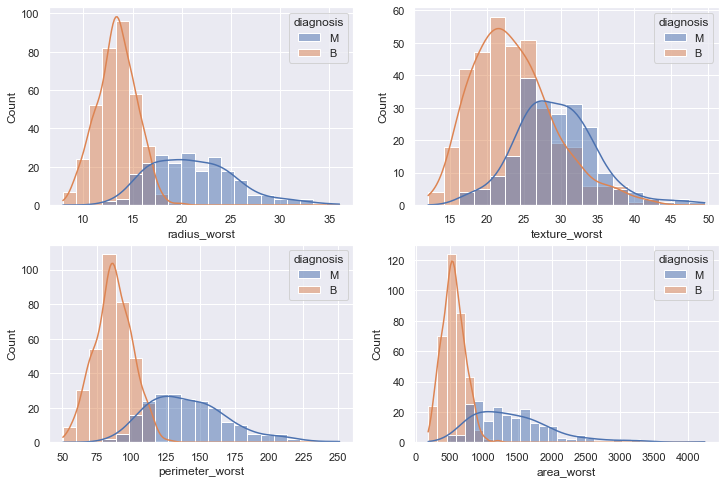

In [9]:
# spatial worsts

sns.set(rc={"figure.figsize":(12, 8)})
fig, axes = plt.subplots(2, 2)

sns.histplot(data=df, x='radius_worst', hue='diagnosis',ax=axes[0,0],kde=True)
sns.histplot(data=df, x='texture_worst', hue='diagnosis',ax=axes[0,1],kde=True)
sns.histplot(data=df, x='perimeter_worst', hue='diagnosis',ax=axes[1,0],kde=True)
sns.histplot(data=df, x='area_worst', hue='diagnosis',ax=axes[1,1],kde=True)

plt.show()

The 'worst' spatial variables demonstrate similar distributions to their mean counterparts and similar levels of overlap when they are split by diagnosis. The purpose of these worst variables is to present the "extreme value" ([Borges](https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection), 2015) of the dataset.

Once again, the <i>radius</i>, <i>perimeter</i> and <i>area</i> from this selection are probably the best-suited candidates for classification.

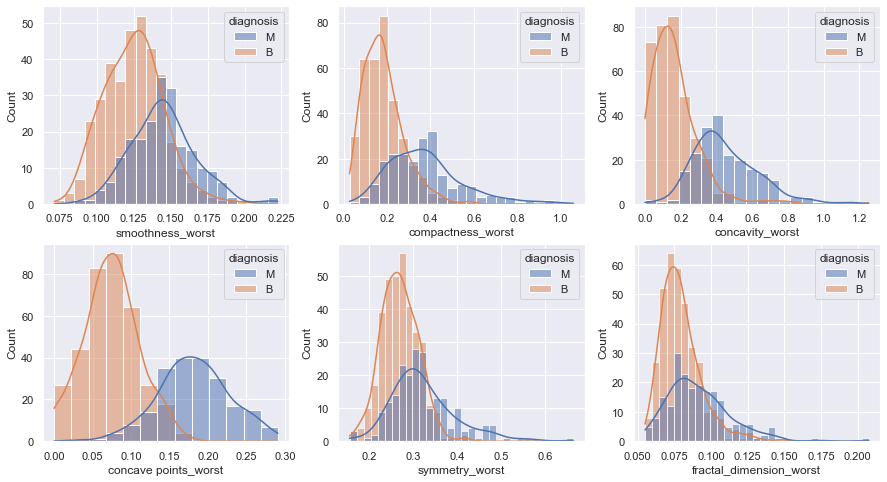

In [10]:
# ratio worsts

frame = df[['diagnosis',
    'smoothness_worst','compactness_worst','concavity_worst',
    'concave points_worst','symmetry_worst','fractal_dimension_worst']]

sns.set(rc={"figure.figsize":(15, 8)})
fig, axes = plt.subplots(2, 3)

sns.histplot(data=frame, x='smoothness_worst', hue='diagnosis',ax=axes[0,0],kde=True)
sns.histplot(data=frame, x='compactness_worst', hue='diagnosis',ax=axes[0,1],kde=True)
sns.histplot(data=frame, x='concavity_worst', hue='diagnosis',ax=axes[0,2],kde=True)
sns.histplot(data=frame, x='concave points_worst', hue='diagnosis',ax=axes[1,0],kde=True)
sns.histplot(data=frame, x='symmetry_worst', hue='diagnosis',ax=axes[1,1],kde=True)
sns.histplot(data=frame, x='fractal_dimension_worst', hue='diagnosis',ax=axes[1,2],kde=True)

plt.show()

As with the spatial variables, the remaining items broadly display similar distributions to their means counterparts. The exceptions to this appears to be the <i>concave points_worst</i>, where malignant results display a more pronounced normal curve, and the benign results are less obviously log-normally distributed. The lack of overlap compared with the rest makes this and the <i>concavity_worst</i> variable the candidates for classification.

As a result of the analysis above, the variables to be used in the prediction model will be <i>radius_mean</i>, <i>area_mean</i>, </i>perimeter_mean<i>, </i>concavity_mean</i>, <i>concave points_mean</i> and <i>concavity_worst</i>, the first three of which display a correlation of 1 to each other, as displayed below. Also visible are a wide range of correlations, ranging from -0.2 to 1.0.

<AxesSubplot:>

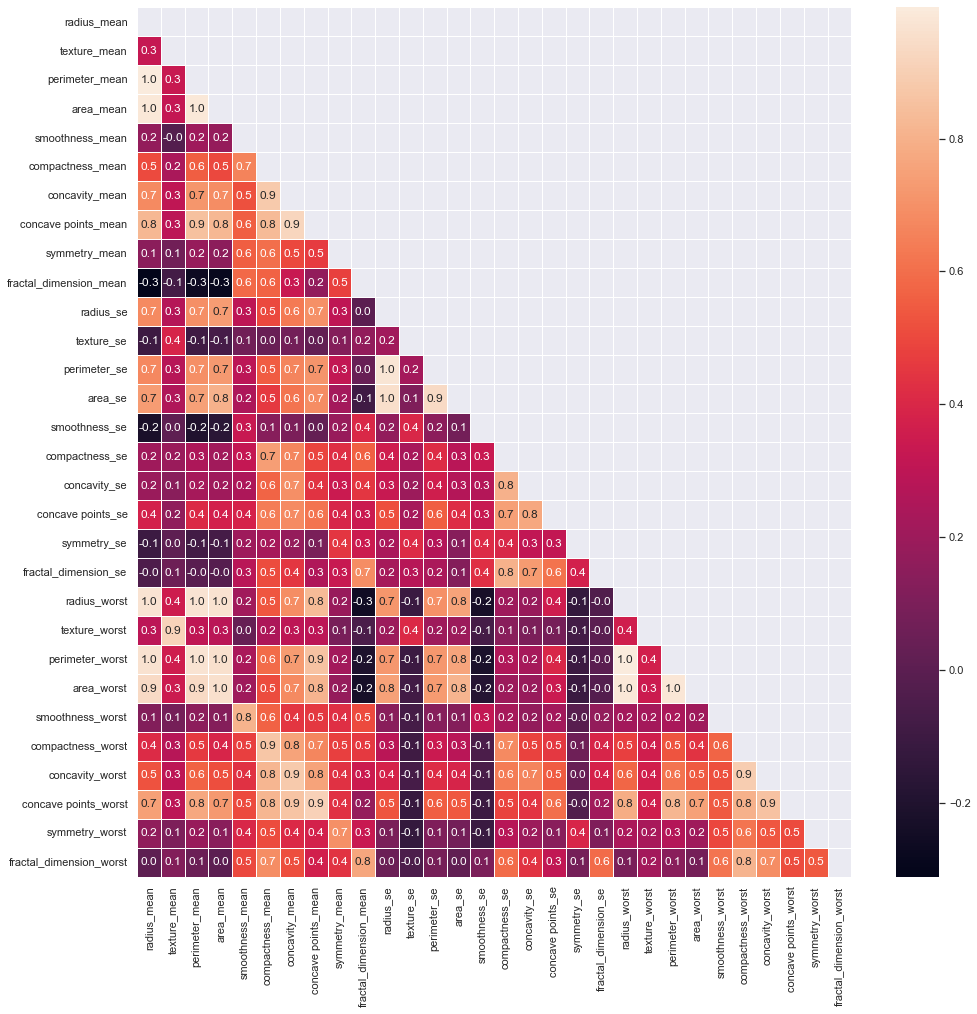

In [11]:
# correlation map, concept taken from Paithankar link in README
f,ax = plt.subplots(figsize=(16, 16))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

## Existing Literature

There is a wide range of published literature available using this dataset, each utilising a range of classification techniques and programming languages to achieve the goal of improved diagnoses, as well as many meta-studies that compare approaches between previous research. Gathered below are some of the techniques used across a handful of studies.

**Naive Bayes** - For the Naive Bayes method, [Mohammad, Teete, et al](https://www.hindawi.com/journals/abb/2022/6187275/) (2022) highlight that the technique is simple to use and relatively lightweight in how it assesses data, but that a number of limitations exist. Firstly, it weights all inputs equally, and secondly does not contain the ability to detect dependencies between variables, hence the name "naive". The importance of identifying key variables for Naive Bayes to test on is borne out by the results reported in research. 

Mohammad, Teete, et all reported a 92.97% diagnostic success rate using Naive Bayes. Ates and Bilgin (2021) bested this with 96.50%, a result they matched using the more complex ANN (see below), and [Ahmad](https://deepnote.com/@umaima-khurshid-ahmad-a1fd/Wisconsin-Breast-Cancer-Analysis-7f141f92-beb3-42ac-a223-de5569144e9b) (2021) recording 95.10%. [Mohammed, Darrab, et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7351679/) (2020) returned a peak result of just 79.85%, while [Singh, Jangir, et al](https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=ccm&AN=156080159&site=eds-live&scope=site&custid=s2873033) (2022) returned 97.36% using a model which used six features for prediction. The latter study contained a second model which used all thirty features in the dataset for prediction, and this model actually decreased in accuracy from the first, to a diagnostic success rate of 96.49%, potentially highlighting the dangers of 'over-training' a model that is mentioned in Mohammad, Teete, et al (2022).

**Artificial Neural Networks** - A much more complex learning method than Naive Bayes, variables are passed through a number of interlinked layers to produce a more accurate estimate based on all required variables, with the decisions made in each layer weighting the next layer ([GeeksForGeeks](https://www.geeksforgeeks.org/artificial-neural-networks-and-its-applications/), 2021). More advanced versions of ANN will contain a feature known as back-propagation, which takes any reported errors and uses them to modify earlier layers.

<img src='https://miro.medium.com/max/720/1*Gh5PS4R_A5drl5ebd_gNrg@2x.webp' width=300 height=300>

<sub>Image from [Towards Data Science](https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6)</sub>

In Mohammad, Teete, et al's (2022) research, ANN achieved a 96.66% diagnostic success rate. [Aamir, Rahim, et al](https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=asn&AN=158544092&site=eds-live&scope=site&custid=s2873033) (2022) achieved a 99.12% success rate using the refined Multilayer Perceptron Model of ANN, while Ates and Bilgin (2021) achieved a slightly lower 96.50%. Singh, Jangir, et al (2022) recorded 96.49% using a six-feature model with the same technique, and 97.28% when using all 30 features.

**Support Vector Machines** - Another method which uses a multi-stage process to best determine the output is SVM. At the most basic level, SVM attempts to create a best-fit line, known as a hyperplane to segment results, if there are three variables inputted to the method, then "the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three" ([GeeksForGeeks](https://www.geeksforgeeks.org/support-vector-machine-algorithm/), 2021). 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/1024px-Svm_separating_hyperplanes_%28SVG%29.svg.png' width=300 height=300>

<sub>Image from [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)</sub>

In their research, Mohammad, Teete, et al (2022) obtained a 97.72% diagnostic success rate when using SVM, and Singh, Jangir, et al achieved an improved 98.24% using a six-feature model. Using the Sequential Minimal Optimisation algorithm, which corrects for a number of inaccuracies ([Platt](https://www.microsoft.com/en-us/research/uploads/prod/1998/04/sequential-minimal-optimization.pdf), 1998) in SVM, Mohammed, Darrab et al (2020) recorded a peak of 95.68%. Using the Whale Optimisation Algorithm ([Mirjalili](https://uk.mathworks.com/matlabcentral/fileexchange/55667-the-whale-optimization-algorithm), 2018) to optimise SVM and training on 70% of the dataset, [Jia, Sun and Zhang](https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=asn&AN=159468373&site=eds-live&scope=site&custid=s2873033) recorded a high of 99.02% using this method, as well as 98.54% when using the Particle Swarm Optimisation algorithm, against 93.20% using default SVM.

**J48 Decision Tree Classifier** - This is somewhat easier to comprehend than ANN and SVM, with each decision following a logic akin to those found in if-else loops or Excel functions, albeit powered by the J48/C4.5 algorithm to optimise performance on large datasets.

<img src='https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png' width=300 height=300>

<sub>Image from [GeeksForGeeks](https://www.geeksforgeeks.org/decision-tree/)</sub>

This would seem to be a more manual approach than others used here, and could become either difficult to maintain (Ates and Bilgin, 2021: 354), especially on datasets with lots of variables ([GeeksForGeeks](https://www.geeksforgeeks.org/decision-tree/), 2022). Given the more simplistic logic at play, it is not suprising that this method only surpassed the Naive Bayes method in performance, with Mohammad, Teete, et al (2022) reporting a 93.15% diagnostic success rate, and Ates and Bilgin (2021) obtaining their lowest result of 92.40% using this method. On the other hand, Mohammed, Darrab, et al (2020) reported their best result using J48, at 98.20% after some re-filtering.

**K-Nearest Neighbours** - The final classifier used by Mohammad, Teete, et al (2022) is K-Nearest Neighbours, a process whereby a value is assigned to _k_, whereby K represents the number of nearest items used to classify a particular object. The image below provides a helpful summary of this operation, with the solid and dashed circles represents two different values of _k_, and dependent on this value, the green item will be marked either as a blue square or a red triangle.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/330px-KnnClassification.svg.png' width=300 height=300>

<sub>Image from [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)</sub>

In the research, Mohammad, Teete, et al (2022) obtained a diagnostic success rate of 95.95% using KNN, while Singh, Jangir, et al (2022) reached 95.61% using their six-feature model, and 96.49% using all thirty features.

Quick summary of results in the literature:

	NB	ANN	SVM	DT	KNN
Mohammad, Teete, et al	92.97	96.66	97.72	93.15	95.95
Ates and Birgin	96.5	96.5	-	92.4	-
Ahmad	95.1	-	-	-	-
Mohammed, Darrab, et al	79.85	-	95.68	98.2	-
Singh, Jangir, et al 6	97.36	96.49	98.24	-	95.61
Singh, Jangir, et al 30	96.49	97.28	-	-	96.49
Aamir, Rahim, et al	-	99.12	-	-	-
Jia, Sun, Zhang PSO	-	-	98.54	-	-
Jia, Sun, Zhang WOA	-	-	99.02	-	-
Jia, Sun, Zhang SVM	-	-	93.2	-	-
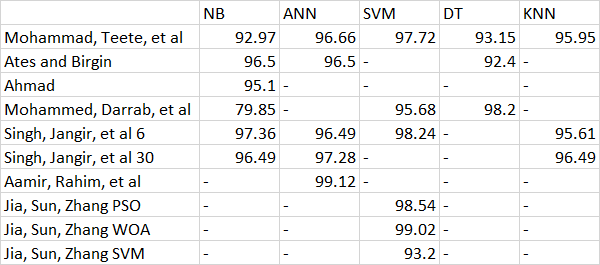

## Classifier Training

From the above it is clear that a wide range of methods have been used to increase the accuracy of predicting breast cancer diagnoses. As outlined above, the variables to be used in this prediction phase will be <i>radius_mean</i>, <i>area_mean</i>, </i>perimeter_mean<i>, </i>concavity_mean</i>, <i>concave points_mean</i> and <i>concavity_worst</i>.

### K-Nearest Neighbours

As the most basic of the methods, it is first worth running the **K-Nearest Neighbours** method to establish a baseline figure for training accuracy, and experimenting with a number of _k_-values in order to see how this affects accuracy. All of the studies I reviewed mentioned the possibility of 'over-training' when using machine learning, notably Singh, Jangir, et al (2022) where a six-variable Naive Bayes method returned a 97.46% diagnostic success rate, with the thirty-variable model returning 96.49%.

By creating a subset of the existing dataset containing only the desired variables, then applying a [train-and-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), the KNN method then runs using the *n_neighbors* parameter, which will be set variously as 5, 7, 9, 11 or 13 for this exercise. Following this, the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function will provide a short summary of the prediction results, including a success rate for each diagnosis, plus an overall weighted diagnostic success rate.

In [226]:
# a range containing all attributes apart from diagnosis
x = df[['radius_mean','area_mean','perimeter_mean','concavity_mean','concave points_mean','concavity_worst']]
# a range containing just diagnosis
y = df['diagnosis']

# create 4 datasets, 2 for attrs, 2 for diagnoses, 1 each of those for training, and the remaining 2 for testing
x_train, x_test, y_train, y_test = sel.train_test_split(x, y, test_size=0.20)

# use a function to standardise the dataset, following the Vyas link in README
scaler = pre.StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# the algorithm used to predict diagnosis, with n_neighbors parameter being how many neighbours determine diagnosis
knn = nei.KNeighborsClassifier(n_neighbors=13)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# a summary of the results, including the 
print(met.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.93      0.94        84
           M       0.81      0.87      0.84        30

    accuracy                           0.91       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.91      0.91      0.91       114



Below is a summary of results from running this code sequence ten times for five different _k_-values, with an average displayed at the bottom of the table. While this a limited summary, the weighted average diagnostic success rate increased with each _k_-value until 9. The peak average success rate is thus 92.8%. for a _k_-value of 9. This compares with values of 95.95% (Mohammad, Teete, et al (2022)), 95.61% (Singh, Jangir, et al (six variables) (2022), and 96.49% (ibid., thirty variables).

<img src='knn-summary.png' height=300, width=300>

### Naive Bayes

- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers
- train and test, compare and contrast between input and output
- Compare, contrast and critique your results with reference to the literature
- SS - how did something run when you did it, as opposed to the literature's results? chances are it won't get as strong as a result as somebody who is doing actual research, but you can still compare and contrast

In [ ]:
# a range containing all attributes apart from diagnosis
x = df[['radius_mean','area_mean','perimeter_mean','concavity_mean','concave points_mean','concavity_worst']]
# a range containing just diagnosis
y = df['diagnosis']

### SVM

- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers
- train and test, compare and contrast between input and output
- Compare, contrast and critique your results with reference to the literature
- SS - how did something run when you did it, as opposed to the literature's results? chances are it won't get as strong as a result as somebody who is doing actual research, but you can still compare and contrast

In [ ]:
# a range containing all attributes apart from diagnosis
x = df[['radius_mean','area_mean','perimeter_mean','concavity_mean','concave points_mean','concavity_worst']]
# a range containing just diagnosis
y = df['diagnosis']

## Data Synthesis

- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- SS - this is quite a small dataset, so in a real-world scenario you'd be looking at synthesising some data to enable a machine to better learn from it
- SS - look at final part of cricket project, use the np.random functions to create values that reflect the distributions identified in the Statistical Analysis section above to randomly assign values
- possibly for evaluation - SS - note that you've no idea how to create data that is also correlated to other variables, also that you wish you could harness values from inside classification_report to enable you to create the Excel charts and plot the data in Python. The k-fold cross-validation link may contain a solution to this.